<a href="https://colab.research.google.com/github/zee404-code/DartsTimeSeries/blob/main/darts04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install darts

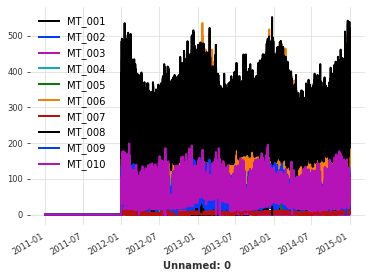

In [ ]:
from darts.datasets import ElectricityDataset
series = ElectricityDataset().load()
series.plot()

140256
92568
47688


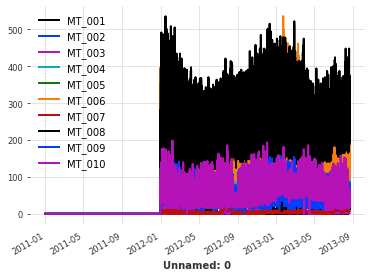

In [ ]:
train, test = series.split_before(0.66)
print(len(series))
print(len(train))
print(len(test))
train.plot()


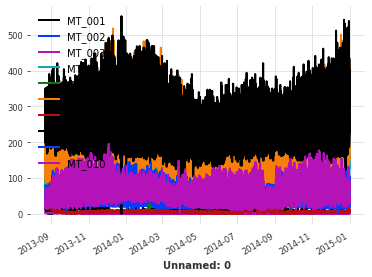

In [ ]:
test.plot()

In [ ]:
from darts.models import VARIMA
from darts.metrics import mape

In [ ]:
from darts.dataprocessing.transformers import Scaler
from darts.models import VARIMA
from darts.metrics import mape
multi_serie_elec = ElectricityDataset().load()
retained_components = ["MT_002", "MT_008", "MT_009"]
multi_serie_elec = multi_serie_elec[retained_components]
# resampling the multivariate time serie
multi_serie_elec = multi_serie_elec.resample(freq="1H")
# keep the values for the last 5 days
multi_serie_elec = multi_serie_elec[-168:]
training_set, validation_set = multi_serie_elec[:-24], multi_serie_elec[-24:]

scaler_dataset = Scaler()

def fit_and_pred(model, training, validation):
  model.fit(training)
  forecast = model.predict(len(validation))
  return forecast

training_scaled = scaler_dataset.fit_transform(training_set)
validation_scaled = scaler_dataset.transform(validation_set)

model_VARIMA = VARIMA(p=12, d=0, q=0, trend = "n")

#training and prediction with the VARIMA model

forecast_VARIMA = fit_and_pred(model_VARIMA, training_scaled, validation_scaled)

print("MAPE (VARIMA) = {:.2f}".format(mape(validation_scaled, forecast_VARIMA)))
forecast_VARIMA = scaler_dataset.inverse_transform(forecast_VARIMA)

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE (VARIMA) = 47.94


In [ ]:
from darts.metrics import mape, coefficient_of_variation, dtw_metric, mae, marre, mase, mse, ope, r2_score, rho_risk, rmse, rmsle, smape

In [ ]:
col1 = ['METRICS', 'MAPE', 'COFFECIENT OF VARIATION','DTW METRIC', 'MAE', 'MARRE', 'MASE',
        'MSE', 'OPE', 'R2 SCORE', 'RHO RISK', 'RMSE', 'RMSLE', 'SMAPE']

In [ ]:
col2 = ['VARIMA', "{:.2f}".format(mape(validation_scaled, forecast_VARIMA)),
        "{:.2f}".format(coefficient_of_variation(validation_scaled, forecast_VARIMA)),
"{:.2f}".format(dtw_metric(validation_scaled, forecast_VARIMA)),
"{:.2f}".format(mae(validation_scaled, forecast_VARIMA)),
"{:.2f}".format(marre(validation_scaled, forecast_VARIMA)),
"doesnt work",
"{:.2f}".format(mse(validation_scaled, forecast_VARIMA)),
"{:.2f}".format(ope(validation_scaled, forecast_VARIMA)),
"{:.2f}".format(r2_score(validation_scaled, forecast_VARIMA)),
"doesnt work",
"{:.2f}".format(rmse(validation_scaled, forecast_VARIMA)),
"{:.2f}".format(rmsle(validation_scaled, forecast_VARIMA)),
"{:.2f}".format(smape(validation_scaled, forecast_VARIMA))]

In [ ]:
import pandas as pd
df = pd.DataFrame()
df = pd.DataFrame(col2, col1)
print(df)

                                   0
METRICS                       VARIMA
MAPE                        37392.15
COFFECIENT OF VARIATION     31953.63
DTW METRIC                    411.65
MAE                           137.22
MARRE                       29694.83
MASE                     doesnt work
MSE                         36427.06
OPE                         31841.87
R2 SCORE                 -1821351.56
RHO RISK                 doesnt work
RMSE                          137.69
RMSLE                           4.06
SMAPE                         196.90
